In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -- custom stuff -- 
from pygama import DataSet
from pygama.analysis.histograms import *

In [2]:
# load the data set and get some basic info in the dataframe

ds = DataSet(runlist=[204], md="./testDB.json")

t2df = ds.get_t2df() # be careful, it can be a lot to load in memory

print(t2df.columns)

Index(['channel', 'energy', 'energy_first', 'ievt', 'packet_id', 'timestamp',
       'ts_hi', 'bl_rms', 'bl_p0', 'bl_p1', 'etrap_max', 'etrap_imax',
       'strap_max', 'strap_imax', 'atrap_max', 'atrap_imax', 'ttrap_max',
       'ttrap_imax', 'savgol_max', 'savgol_imax', 'current_max',
       'current_imax', 'tp5', 'tp10', 'tp50', 'tp100', 'n_curr_pks',
       's_curr_pks', 't0', 't_ftp', 'e_ftp', 'overflow', 'tslope_savgol',
       'tslope_pz', 'tail_amp', 'tail_tau'],
      dtype='object')


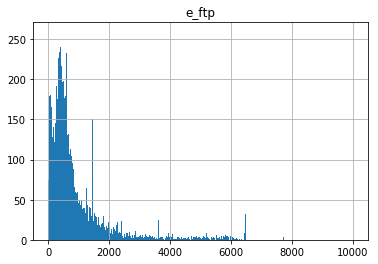

In [3]:
# plot directly from the pd.DataFrame

xlo, xhi, xpb = 0, 10000, 10
t2df.hist("e_ftp", bins=int((xhi-xlo)/xpb), range=(xlo, xhi))
plt.show()

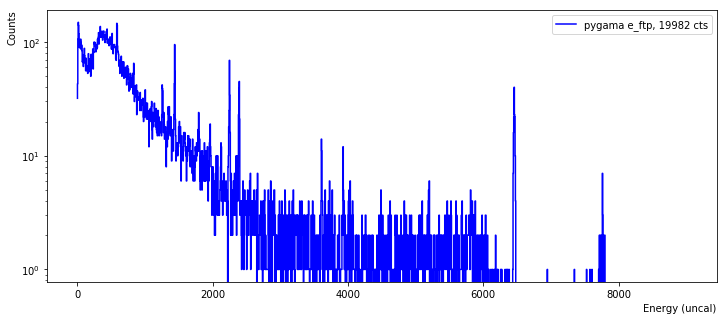

In [4]:
# make a simple plot with matplotlib and np.histogram

xlo, xhi, xpb = 0, 9000, 5
nbins = int((xhi-xlo)/xpb)

arr = t2df["e_ftp"]

hist, bins = np.histogram(arr, nbins, (xlo, xhi))

# annoying - have to add an extra zero
hist = np.concatenate((hist, [0]))

plt.figure(figsize=(12,5))
plt.semilogy(bins, hist, ls='steps', lw=1.5, c='b', label="pygama e_ftp, {} cts".format(sum(hist)))
plt.xlabel("Energy (uncal)", ha='right', x=1)
plt.ylabel("Counts", ha='right', y=1)
plt.legend()
plt.show()

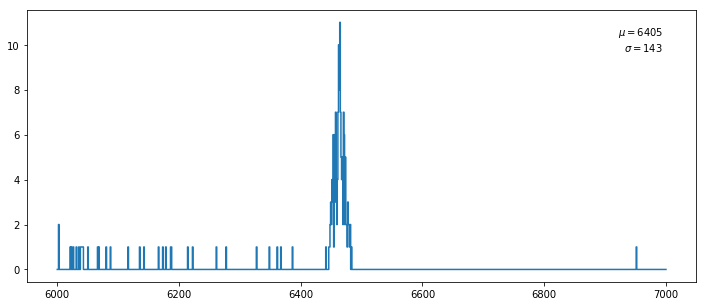

In [11]:
# make a histogram with pygama's built in functions

xlo, xhi, xpb = 6000, 7000, 1
nbins = int((xhi-xlo)/xpb)

arr = t2df["e_ftp"]

hist, bins, var = get_hist(arr, range=(xlo, xhi), dx=xpb)

import pygama.analysis.calibration as pgc
import pygama.utils as pgu
pars, cov = pgc.fit_hist(pgc.gauss, hist, bins, var=var, guess=[6300, 20, 100])
# pgu.plot_func(pgc.gauss, pars)

plt.figure(figsize=(12,5))
plot_hist(hist, bins, show_stats=True)

In [ ]:
# try out some more pygama functionality